Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    1.225  0.297   0.711    1.810      0.007    0.005    1721.0    1412.0   
theta -0.081  0.165  -0.401    0.216      0.004    0.004    1871.0    1145.0   

       r_hat  
tau      1.0  
theta    1.0  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    1.142  0.303   0.573    1.672      0.007    0.005    1707.0    1271.0   
theta -0.073  0.180  -0.419    0.256      0.004    0.004    1977.0    1219.0   

       r_hat  
tau      1.0  
theta    1.0  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    0.787  0.112   0.585    0.976      0.003    0.002    1227.0     815.0   
theta -0.070  0.197  -0.439    0.292      0.005    0.004    1532.0     776.0   

       r_hat  
tau     1.01  
theta   1.00  


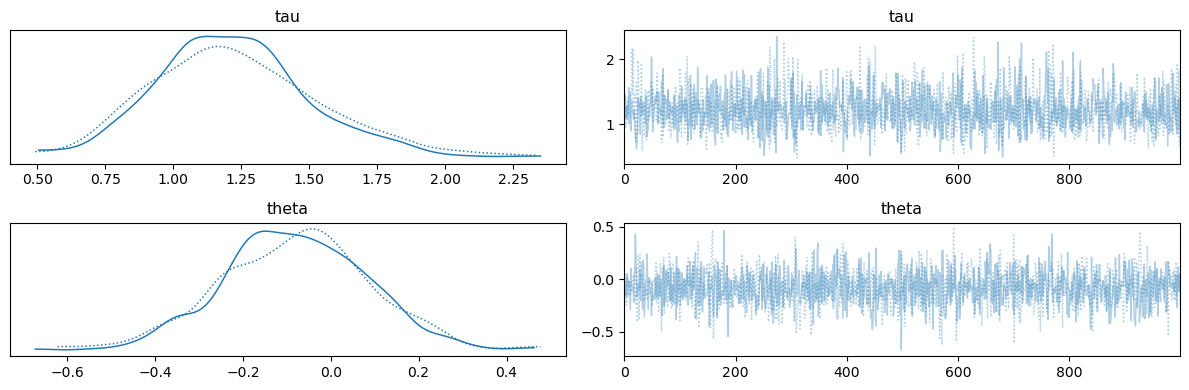

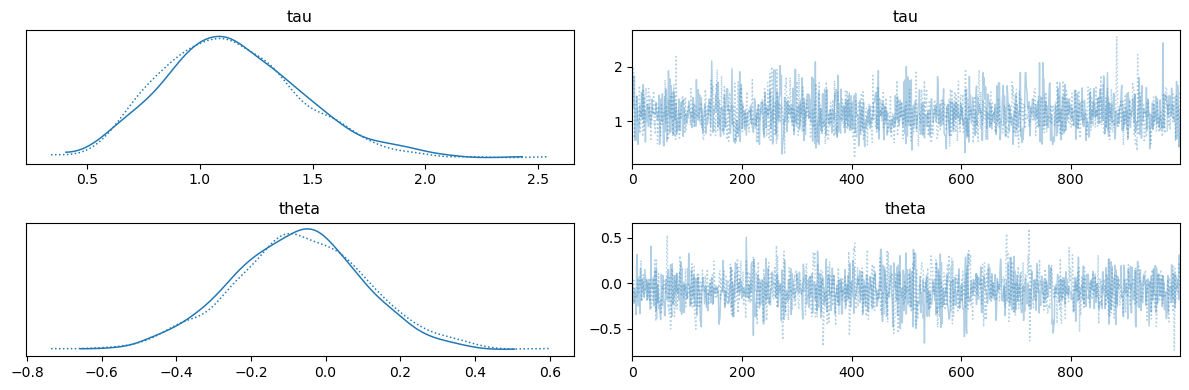

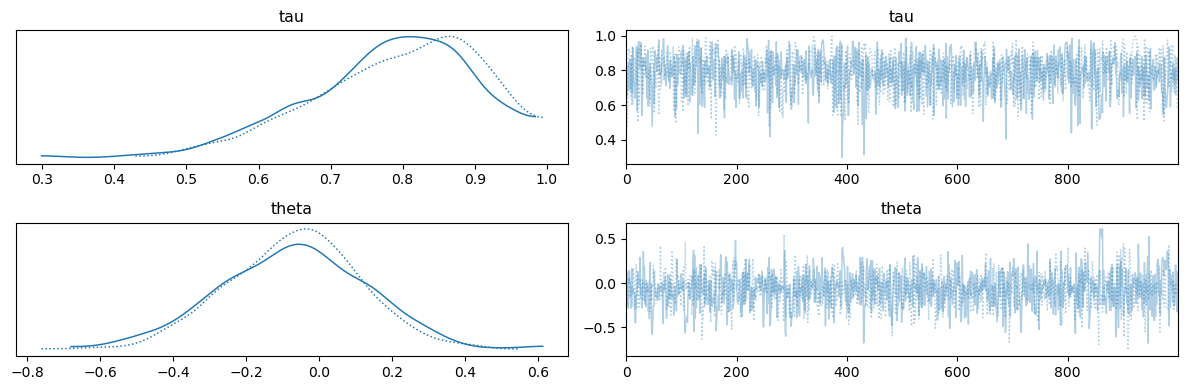

In [3]:
#Q2
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

n = 30
x = np.random.normal(loc=0, scale=1, size=n)

with pm.Model() as model1:
    theta = pm.Normal('theta', mu=0, sigma=1)
    tau = pm.Gamma('tau', alpha=2, beta=1)
    x_obs = pm.Normal('x_obs', mu=theta, tau=tau, observed=x)
    idata1 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(idata1)
plt.tight_layout()
print(az.summary(idata1))

with pm.Model() as model2:
    theta = pm.Uniform('theta', lower=-5, upper=5)
    tau = pm.Exponential('tau', lam=1)
    x_obs = pm.Normal('x_obs', mu=theta, tau=tau, observed=x)
    idata2 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(idata2)
plt.tight_layout()
print(az.summary(idata2))

with pm.Model() as model3:
    theta = pm.Laplace('theta', mu=0, b=1)
    tau = pm.Beta('tau', alpha=2, beta=2)
    x_obs = pm.Normal('x_obs', mu=theta, tau=tau, observed=x)
    idata3 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(idata3)
plt.tight_layout()
print(az.summary(idata3))


In Model 1, theta follows a normal distribution with mean 0 and standard deviation 1, while tau follows a gamma distribution with shape parameter 2 and rate parameter 1. The MCMC trace plots show good mixing without noticeable trends, showing convergence. The posterior distribution of theta is approximately normal, while tau has a right-skewed shape due to the gamma prior. This model provides stable estimation, with tau effectively capturing uncertainty.

In Model 2, theta follows a uniform distribution between -5 and 5, while tau follows an exponential distribution with a rate parameter of 1. The trace plots indicate stable sampling behavior. The posterior distribution of theta is more dispersed compared to Model 1 due to the uniform prior, while tau is concentrated toward smaller values, reflecting the influence of the exponential prior. This model allows for a wider range of theta estimates but may overly constrain variance due to the nature of the tau prior.

In Model 3, theta follows a Laplace distribution centered at 0 with a scale parameter of 1, while tau follows a beta distribution with parameters 2 and 2. The MCMC chains remain stable. The posterior distribution of theta is more sharply peaked than in Model 1, reflecting the heavier tails of the Laplace prior. Tau is constrained within the range of 0 to 1 due to the beta prior, leading to a more concentrated posterior estimate. This model is suitable when a more robust estimation of theta is needed.

Overall, Model 1 is the most balanced choice for standard normal data. Model 2 allows for broader exploration of theta, though the exponential prior on tau limits its flexibility. Model 3 enforces stronger constraints, making it preferable in specific contexts where robustness is required.

In [5]:
# Q3

Slice sampling is an MCMC method used to generate samples from a given target distribution using the inclusion of an auxiliary variable. Rather than proposing new variables of interest, this approach initially samples a cutoff point uniformly over the range of the function's vertical axis to generate a horizontal slice. The algorithm next selects a new point at random in the region over which the function is higher than this cutoff point. This approach ensures that proposed samples are always accepted, hence eliminating the usual rejection step found in Metropolis-Hastings sampling. The given code follows a recursive function to iteratively tighten the sampling range. The function initially decides on a range around the current point in which function value is over the cutoff point. The function samples a new candidate point uniformly over a given specified range. If the sampled point is higher than the cutoff point, it is accepted straight away; otherwise, the range is reduced, and the process is continued. The function of `slice_f_at_y` recursively tightens up until a suitable sample is found. The method is highly useful in Gibbs sampling when it is hard to normalize conditional distributions since slice sampling reduces explicit use of acceptance probabilities. In the given code, a Beta distribution is used as a target distribution. The function of slice sampling iteratively produces samples, and it is displayed using trace plots that illustrate sample progression over iteration. The method ensures that resulting samples adhere to the target distribution without demanding proposal tuning even in high-dimensional or complicated distributions.

# Q1 PyMC  Gallery

## Introductory
- [General Overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview)
- [Simple Linear Regression](https://www.pymc.io/projects/examples/en/latest/gallery.html)
- [General API Quickstart](https://www.pymc.io/projects/examples/en/latest/gallery.html)

![Milwaukee Bucks Logo](https://upload.wikimedia.org/wikipedia/en/4/4a/Milwaukee_Bucks_logo.svg)

---

## Library Fundamentals
- [Distribution Dimensionality](https://www.pymc.io/projects/examples/en/latest/library_fundamentals/distribution_dimensionality.html)
- [PyMC and PyTensor](https://www.pymc.io/projects/examples/en/latest/library_fundamentals/pymc_and_pytensor.html)
- [Using Data Containers](https://www.pymc.io/projects/examples/en/latest/library_fundamentals/using_data_containers.html)

![Milwaukee Bucks Logo](https://upload.wikimedia.org/wikipedia/en/4/4a/Milwaukee_Bucks_logo.svg)

---

## Model Examples
- [Hierarchical Linear Regression](https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/GLM-hierarchical.html)
- [Bayesian Neural Networks](https://www.pymc.io/projects/examples/en/latest/machine_learning/neural_networks.html)
- [Gaussian Processes](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-sparse.html)
- [Hidden Markov Models](https://www.pymc.io/projects/examples/en/latest/time_series/HMMs.html)

![Milwaukee Bucks Logo](https://upload.wikimedia.org/wikipedia/en/4/4a/Milwaukee_Bucks_logo.svg)

---

## Advanced Topics
- [Markov Chain Monte Carlo (MCMC)](https://www.pymc.io/projects/examples/en/latest/samplers/MCMC.html)
- [Hamiltonian Monte Carlo (HMC)](https://www.pymc.io/projects/examples/en/latest/samplers/HMC.html)
- [Variational Inference](https://www.pymc.io/projects/examples/en/latest/variational_inference/VI.html)

![Milwaukee Bucks Logo](https://upload.wikimedia.org/wikipedia/en/4/4a/Milwaukee_Bucks_logo.svg)

---

## Miscellaneous Examples
1. [Bayesian Updating](https://www.pymc.io/projects/examples/en/latest/miscellaneous/bayesian_updating.html)
2. [Mixture Models](https://www.pymc.io/projects/examples/en/latest/mixture_models/mixture_models.html)
3. [Probabilistic Programming in PyMC](https://www.pymc.io/projects/examples/en/latest/probabilistic_programming/probabilistic_programming.html)
4. [Time Series Forecasting](https://www.pymc.io/projects/examples/en/latest/time_series/time_series_forecasting.html)
5. [Causal Inference](https://www.pymc.io/projects/examples/en/latest/causal_inference/causal_inference.html)
6. [Bayesian A/B Testing](https://www.pymc.io/projects/examples/en/latest/AB_testing/bayesian_ab_testing.html)
7. [Nonparametric Models](https://www.pymc.io/projects/examples/en/latest/nonparametric/nonparametric_models.html)
8. [Posterior Predictive Checks](https://www.pymc.io/projects/examples/en/latest/posterior_predictive/posterior_predictive_checks.html)
9. [Bayesian Optimization](https://www.pymc.io/projects/examples/en/latest/optimization/bayesian_optimization.html)
10. [Survival Analysis](https://www.pymc.io/projects/examples/en/latest/survival_analysis/survival_analysis.html)
11. [Stochastic Volatility Models](https://www.pymc.io/projects/examples/en/latest/stochastic_volatility/stochastic_volatility.html)
12. [Probabilistic Principal Component Analysis (PPCA)](https://www.pymc.io/projects/examples/en/latest/dimensionality_reduction/PPCA.html)
13. [Decision Theory Applications](https://www.pymc.io/projects/examples/en/latest/decision_theory/decision_theory_applications.html)

![Milwaukee Bucks Logo](https://upload.wikimedia.org/wikipedia/en/4/4a/Milwaukee_Bucks_logo.svg)

---

## Additional Resources
- [PyMC Official Documentation](https://www.pymc.io/projects/docs/en/stable/)
- [PyMC GitHub Repository](https://github.com/pymc-devs/pymc)
- [PyMC Discourse Forum](https://discourse.pymc.io/)
